### First lesson - basics of tensorflow and keras

In [10]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Value normalized between 0 and 1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Sequential() is for feed-forward networks
model = tf.keras.models.Sequential()
# With feed-forward we want flatten input layer
model.add(tf.keras.layers.Flatten())
# Two hidden layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2626 - acc: 0.9228
Epoch 2/3
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1070 - acc: 0.9673
Epoch 3/3
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0724 - acc: 0.9773


In [12]:
val_loss, val_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 40us/sample - loss: 0.0878 - acc: 0.9742


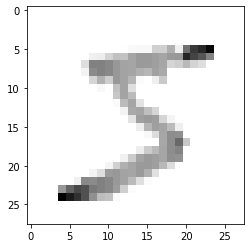

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [13]:
predictions = model.predict(x_test)

In [14]:
predictions

array([[2.91196987e-08, 1.84144948e-08, 1.56867809e-05, ...,
        9.99940395e-01, 2.77287154e-06, 8.43133307e-07],
       [1.63548453e-09, 1.40661723e-04, 9.99847770e-01, ...,
        1.97791761e-09, 2.84454359e-06, 3.10490939e-11],
       [9.61384643e-08, 9.99912381e-01, 2.97769584e-05, ...,
        3.23867935e-05, 8.22218681e-06, 1.09017583e-06],
       ...,
       [1.12689313e-09, 1.09997345e-07, 2.04917221e-08, ...,
        4.89737831e-05, 3.28515455e-07, 1.21591256e-04],
       [4.09731086e-07, 5.28685860e-07, 8.48196713e-09, ...,
        3.22457822e-07, 1.42205768e-04, 2.18203464e-08],
       [4.72259444e-07, 2.32737936e-08, 1.33029545e-07, ...,
        1.04007802e-09, 7.55527836e-08, 1.59724447e-08]], dtype=float32)

In [15]:
import numpy as np

print(np.argmax(predictions[0]))

7


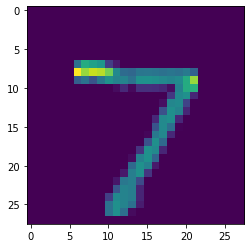

In [16]:
plt.imshow(x_test[0])

### Second lesson - dogs and cats

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

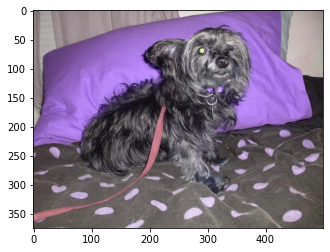

In [27]:
DATADIR = "C:/Users/david/Downloads/dogsandcats/PetImages"
CATEGORIES =['Dog', 'Cat']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [28]:
img_array.shape

(375, 500, 3)

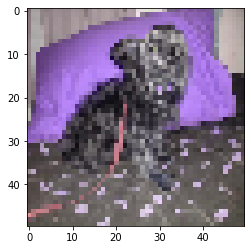

In [35]:
#We need to resize and normalize the images resolution, since images can have different resolutions between one another
IMG_SIZE = 50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [37]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

In [38]:
print(len(training_data))

24946


In [39]:
import random

random.shuffle(training_data)

In [40]:
for sample in training_data[:10]:
    print(sample[1])

1
0
0
0
0
0
1
1
0
0


In [46]:
X = [] #Features set
Y = [] #Labels set

In [47]:
for features,label in training_data:
    X.append(features)
    Y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [48]:
X

array([[[[ 32],
         [ 32],
         [ 33],
         ...,
         [ 43],
         [ 46],
         [ 47]],

        [[ 30],
         [ 28],
         [ 32],
         ...,
         [ 47],
         [ 46],
         [ 43]],

        [[ 30],
         [ 30],
         [ 30],
         ...,
         [ 45],
         [ 44],
         [ 50]],

        ...,

        [[ 87],
         [ 90],
         [ 90],
         ...,
         [ 19],
         [ 14],
         [ 17]],

        [[ 82],
         [ 85],
         [ 88],
         ...,
         [ 23],
         [ 15],
         [ 16]],

        [[ 79],
         [ 85],
         [ 87],
         ...,
         [ 17],
         [ 15],
         [ 14]]],


       [[[ 63],
         [ 60],
         [ 59],
         ...,
         [ 87],
         [ 48],
         [128]],

        [[ 66],
         [ 58],
         [ 61],
         ...,
         [171],
         [153],
         [155]],

        [[ 67],
         [ 49],
         [ 58],
         ...,
         [ 94],
         [

In [49]:
import pickle

pickle_out = open("X.pickle", 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", 'wb')
pickle.dump(Y, pickle_out)
pickle_out.close()

In [50]:
pickle_in = open("X.pickle", 'rb')
X = pickle.load(pickle_in)

### Third lesson - convolutional neural network

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

In [56]:
X = pickle.load(open("X.pickle", 'rb'))
y = pickle.load(open("Y.pickle", 'rb'))

In [62]:
# We need to normalize our data dividing by 255
X = X/255.0

model = Sequential()
# Convolutional with a window of (3,3)
model.add(Conv2D(64, (3,3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=1, validation_split=0.1)

Train on 22451 samples, validate on 2495 samples
22451/22451 [==============================] - 59s 3ms/sample - loss: 0.6935 - acc: 0.4981 - val_loss: 0.6930 - val_acc: 0.5086


### DQN without libraries

In [15]:
import numpy as np
import keras.backend.tensorflow_backend as backend
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Activation, Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import tensorflow as tf
from collections import deque
import time
import random
from tqdm import tqdm
import os
from PIL import Image
import cv2

In [16]:
REPLAY_MEMORY_SIZE = 50_000
MIN_REPLAY_MEMORY_SIZE = 1_000
MINIBATCH_SIZE = 64
MODEL_NAME = "256x2"
DISCOUNT = 0.99
UPDATE_TARGET_EVERY = 5
MIN_REWARD = -200  # For model save
MEMORY_FRACTION = 0.20


# Environment settings
EPISODES = 20_000

# Exploration settings
epsilon = 1  # not a constant, going to be decayed
EPSILON_DECAY = 0.99975
MIN_EPSILON = 0.001

#  Stats settings
AGGREGATE_STATS_EVERY = 50  # episodes
SHOW_PREVIEW = False

In [17]:
class Blob:
    def __init__(self, size):
        self.size = size
        self.x = np.random.randint(0, size)
        self.y = np.random.randint(0, size)

    def __str__(self):
        return f"Blob ({self.x}, {self.y})"

    def __sub__(self, other):
        return (self.x-other.x, self.y-other.y)

    def __eq__(self, other):
        return self.x == other.x and self.y == other.y

    def action(self, choice):
        '''
        Gives us 9 total movement options. (0,1,2,3,4,5,6,7,8)
        '''
        if choice == 0:
            self.move(x=1, y=1)
        elif choice == 1:
            self.move(x=-1, y=-1)
        elif choice == 2:
            self.move(x=-1, y=1)
        elif choice == 3:
            self.move(x=1, y=-1)

        elif choice == 4:
            self.move(x=1, y=0)
        elif choice == 5:
            self.move(x=-1, y=0)

        elif choice == 6:
            self.move(x=0, y=1)
        elif choice == 7:
            self.move(x=0, y=-1)

        elif choice == 8:
            self.move(x=0, y=0)

    def move(self, x=False, y=False):

        # If no value for x, move randomly
        if not x:
            self.x += np.random.randint(-1, 2)
        else:
            self.x += x

        # If no value for y, move randomly
        if not y:
            self.y += np.random.randint(-1, 2)
        else:
            self.y += y

        # If we are out of bounds, fix!
        if self.x < 0:
            self.x = 0
        elif self.x > self.size-1:
            self.x = self.size-1
        if self.y < 0:
            self.y = 0
        elif self.y > self.size-1:
            self.y = self.size-1

In [18]:
class BlobEnv:
    SIZE = 10
    RETURN_IMAGES = True
    MOVE_PENALTY = 1
    ENEMY_PENALTY = 300
    FOOD_REWARD = 25
    OBSERVATION_SPACE_VALUES = (SIZE, SIZE, 3)  # 4
    ACTION_SPACE_SIZE = 9
    PLAYER_N = 1  # player key in dict
    FOOD_N = 2  # food key in dict
    ENEMY_N = 3  # enemy key in dict
    # the dict! (colors)
    d = {1: (255, 175, 0),
         2: (0, 255, 0),
         3: (0, 0, 255)}

    def reset(self):
        self.player = Blob(self.SIZE)
        self.food = Blob(self.SIZE)
        while self.food == self.player:
            self.food = Blob(self.SIZE)
        self.enemy = Blob(self.SIZE)
        while self.enemy == self.player or self.enemy == self.food:
            self.enemy = Blob(self.SIZE)

        self.episode_step = 0

        if self.RETURN_IMAGES:
            observation = np.array(self.get_image())
        else:
            observation = (self.player-self.food) + (self.player-self.enemy)
        return observation

    def step(self, action):
        self.episode_step += 1
        self.player.action(action)

        #### MAYBE ###
        #self.enemy.move()
        #self.food.move()
        ##############

        if self.RETURN_IMAGES:
            new_observation = np.array(self.get_image())
        else:
            new_observation = (self.player-self.food) + (self.player-self.enemy)

        if self.player == self.enemy:
            reward = -self.ENEMY_PENALTY
        elif self.player == self.food:
            reward = self.FOOD_REWARD
        else:
            reward = -self.MOVE_PENALTY

        done = False
        if reward == self.FOOD_REWARD or reward == -self.ENEMY_PENALTY or self.episode_step >= 200:
            done = True

        return new_observation, reward, done

    def render(self):
        img = self.get_image()
        img = img.resize((300, 300))  # resizing so we can see our agent in all its glory.
        cv2.imshow("image", np.array(img))  # show it!
        cv2.waitKey(1)

    # FOR CNN #
    def get_image(self):
        env = np.zeros((self.SIZE, self.SIZE, 3), dtype=np.uint8)  # starts an rbg of our size
        env[self.food.x][self.food.y] = self.d[self.FOOD_N]  # sets the food location tile to green color
        env[self.enemy.x][self.enemy.y] = self.d[self.ENEMY_N]  # sets the enemy location to red
        env[self.player.x][self.player.y] = self.d[self.PLAYER_N]  # sets the player tile to blue
        img = Image.fromarray(env, 'RGB')  # reading to rgb. Apparently. Even tho color definitions are bgr. ???
        return img

    
env = BlobEnv()

# For stats
ep_rewards = [-200]

# For more repetitive results
random.seed(1)
np.random.seed(1)
tf.set_random_seed(1)


In [19]:
# Own Tensorboard class
class ModifiedTensorBoard(TensorBoard):

    # Overriding init to set initial step and writer (we want one log file for all .fit() calls)
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.step = 1
        self.writer = tf.summary.FileWriter(self.log_dir)

    # Overriding this method to stop creating default log writer
    def set_model(self, model):
        pass

    # Overrided, saves logs with our step number
    # (otherwise every .fit() will start writing from 0th step)
    def on_epoch_end(self, epoch, logs=None):
        self.update_stats(**logs)

    # Overrided
    # We train for one batch only, no need to save anything at epoch end
    def on_batch_end(self, batch, logs=None):
        pass

    # Overrided, so won't close writer
    def on_train_end(self, _):
        pass

    # Custom method for saving own metrics
    # Creates writer, writes custom metrics and closes writer
    def update_stats(self, **stats):
        self._write_logs(stats, self.step)

In [27]:
class DQNAgent:
    def __init__(self):
        # main model
        self.model = self.create_model()
        
        # target model
        self.target_model = self.create_model()
        self.target_model.set_weights(self.model.get_weights())
        
        self.replay_memory = deque(maxlen=REPLAY_MEMORY_SIZE)
        self.tensorboard = ModifiedTensorBoard(log_dir=f"logs/{MODEL_NAME}-{int(time.time())}")
        self.target_update_counter = 0
    
    def create_model(self):
        model = Sequential()
        model.add(Conv2D(256, (3,3), input_shape=env.OBSERVATION_SPACE_VALUES))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(2,2))
        model.add(Dropout(0.2))
        
        model.add(Conv2D(256, (3,3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(2,2))
        model.add(Dropout(0.2))
        
        model.add(Flatten())
        model.add(Dense(64))
        
        model.add(Dense(env.ACTION_SPACE_SIZE, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(lr=0.001), metrics=['accuracy'])
        return model
    
    def update_replay_memory(self, transition):
        self.replay_memory.append(transition)
        
    def get_qs(self, state):
        return self.model.predict(np.array(state).reshape(-1, *state.shape)/256)[0]
    
    def train(self, terminal_state, step):
        if len(self.replay_memory) < MIN_REPLAY_MEMORY_SIZE:
            return
        
        minibatch = random.sample(self.replay_memory, MINIBATCH_SIZE)
        
        current_states = np.array([transition[0] for transition in minibatch])/255
        current_qs_list = self.model.predict(current_states)
        
        new_current_states = np.array([transition[3] for transition in minibatch])/255
        future_qs_list = self.target_model.predict(new_current_states)
        
        X = []   # features set - images of env (input)
        y = []   # labels - actions (output)
        
        for index, (current_state, action, reward, new_current_state, done) in enumerate(minibatch):
            if not done:
                max_future_q = np.max(future_qs_list[index])
                new_q = reward + DISCOUNT * max_future_q
            else:
                new_q = reward
                
            current_qs = current_qs_list[index] 
            current_qs[action] = new_q
            
            X.append(current_state)
            y.append(current_qs)
            
        self.model.fit(np.array(X)/255, np.array(y), batch_size=MINIBATCH_SIZE, verbose=0, shuffle=False, callbacks=[self.tensorboard] if terminal_state else None)
        
        # updating to determine if we want to update target_model yet
        if terminal_state:
            self.target_update_counter += 1
            
        if self.target_update_counter > UPDATE_TARGET_EVERY:
            self.target_model.set_weights(self.model.get_weights())
            self.target_update_counter = 0

In [28]:
agent = DQNAgent()

for episode in tqdm(range(1, EPISODES+1), ascii=True, unit='episode'):
    agent.tensorboard.step = episode
    
    episode_reward = 0
    step = 1
    current_state = env.reset()
    
    done = False
    
    while not done:
        if np.random.random() > epsilon:
            action = np.argmax(agent.get_qs(current_state))
        else:
            action = np.random.randint(0, env.ACTION_SPACE_SIZE)
            
        new_state, reward, done =  env.step(action)
        
        episode_reward += reward
        
        if SHOW_PREVIEW and not episode % AGGREGATE_STATE_EVERY:
            env.render()
        
        agent.update_replay_memory((current_state, action,reward, new_state,  done))
        agent.train(done, step)
        
        current_state = new_state
        step += 1
    
    # Append episode reward to a list and log stats (every given number of episodes)
    ep_rewards.append(episode_reward)
    if not episode % AGGREGATE_STATS_EVERY or episode == 1:
        average_reward = sum(ep_rewards[-AGGREGATE_STATS_EVERY:])/len(ep_rewards[-AGGREGATE_STATS_EVERY:])
        min_reward = min(ep_rewards[-AGGREGATE_STATS_EVERY:])
        max_reward = max(ep_rewards[-AGGREGATE_STATS_EVERY:])
        agent.tensorboard.update_stats(reward_avg=average_reward, reward_min=min_reward, reward_max=max_reward, epsilon=epsilon)
    
    # Decay epsilon
    if epsilon > MIN_EPSILON:
        epsilon *= EPSILON_DECAY
        epsilon = max(MIN_EPSILON, epsilon)

  0%|          | 0/20000 [00:00<?, ?episode/s]

  0%|          | 20/20000 [00:55<15:23:29,  2.77s/episode]


KeyboardInterrupt: 